Cutom CNN Model

In [ ]:
# ✅ 1. Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# ✅ 2. Set Paths
dataset_path = '/content/drive/MyDrive/Dataset Images/'  # Parent folder with AiArtData and RealArt
image_size = (224, 224)
batch_size = 32

In [ ]:
# ✅ 3. Image Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 1553 images belonging to 3 classes.
Found 387 images belonging to 3 classes.


In [ ]:
# ✅ 4. Build Custom Model
model = Sequential([
    InputLayer(input_shape=(224, 224, 3)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# ✅ 5. Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# ✅ 6. Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('custom_cnn_model.h5', save_best_only=True)

In [ ]:
# ✅ 7. Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.4710 - loss: 0.4213 - val_accuracy: 0.4987 - val_loss: -0.8659
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.4892 - loss: 0.3206 - val_accuracy: 0.4858 - val_loss: -0.2908
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4919 - loss: 0.2162

49/49 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.4916 - loss: 0.2165 - val_accuracy: 0.4987 - val_loss: -1.6179
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4814 - loss: 0.1317

49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4815 - loss: 0.1326 - val_accuracy: 0.5013 - val_loss: -2.5447
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.5153 - loss: 0.1505 - val_accuracy: 0.4987 - val_loss: -1.5260
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.5010 - loss: 0.1158 - val_accuracy: 0.4961 - val_loss: -1.3064
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5027 - loss: 0.0790 - val_accuracy: 0.4884 - val_loss: -1.7659
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.4844 - loss: 0.0113 - val_accuracy: 0.4858 - val_loss: -1.7787
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5064 - loss: 0.0602

49/49 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.5062 - loss: 0.0599 - val_accuracy: 0.4858 - val_loss: -4.9210
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.5069 - loss: -0.0769 - val_accuracy: 0.4961 - val_loss: -2.0475


In [ ]:
# ✅ 8. Evaluate the Model
val_generator.reset()
loss, accuracy = model.evaluate(val_generator)
print(f"\n✅ Validation Accuracy: {accuracy*100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 929ms/step - accuracy: 0.3747 - loss: 2.9300

✅ Validation Accuracy: 48.84%


In [ ]:
# ✅ 9. Generate Predictions & Report
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = np.round(y_pred_probs).astype(int).flatten()

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))

print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step

📊 Classification Report:
              precision    recall  f1-score   support

   AiArtData       0.25      0.01      0.02       107
     ArtData       0.50      0.98      0.66       194
     RealArt       0.00      0.00      0.00        86

    accuracy                           0.50       387
   macro avg       0.25      0.33      0.23       387
weighted avg       0.32      0.50      0.34       387


🧩 Confusion Matrix:
[[  1 106   0]
 [  3 191   0]
 [  0  86   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


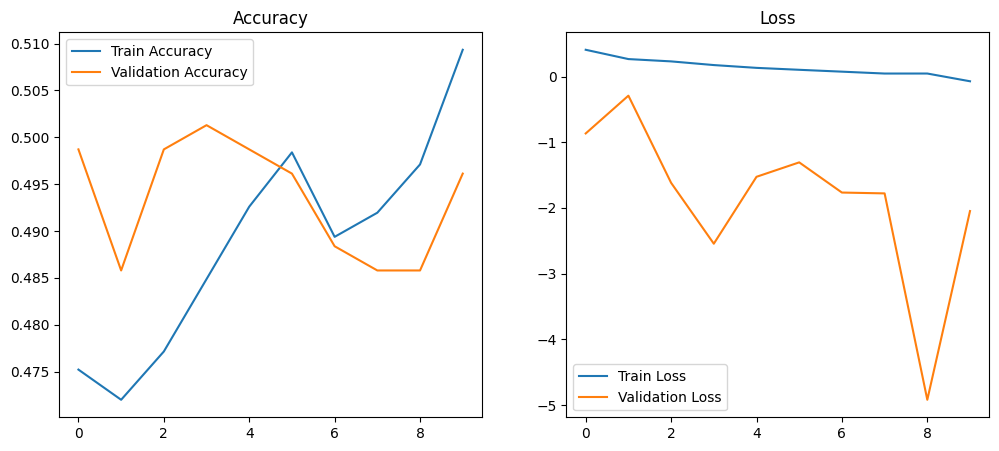

In [ ]:
# ✅ 10. Plot Training Graphs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

ResNet50

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Step 2: Define dataset path
dataset_path = '/content/drive/MyDrive/Dataset Images/ArtData'

In [ ]:
# Step 3: Image preprocessing
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 777 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


In [ ]:
# Step 4: Load ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Step 5: Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Step 7: Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6097 - loss: 0.9280 - val_accuracy: 0.8031 - val_loss: 0.4511
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8231 - loss: 0.3755 - val_accuracy: 0.8187 - val_loss: 0.4310
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8608 - loss: 0.3272 - val_accuracy: 0.7927 - val_loss: 0.4315
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8744 - loss: 0.2711 - val_accuracy: 0.8083 - val_loss: 0.4260
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9275 - loss: 0.1939 - val_accuracy: 0.8031 - val_loss: 0.4534
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9406 - loss: 0.1708 - val_accuracy: 0.7979 - val_loss: 0.4819
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9635 - loss: 0.1207 - val_accuracy: 0.8083 - val_loss: 0.4464
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9927 - loss: 0.0774 - val_accuracy: 0.7979 - val_loss: 0.4991
Epo

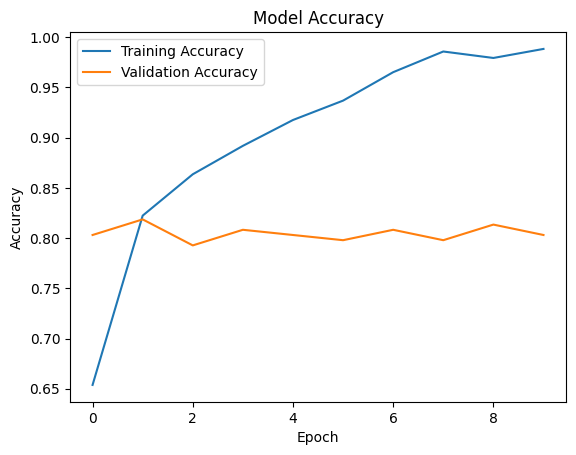

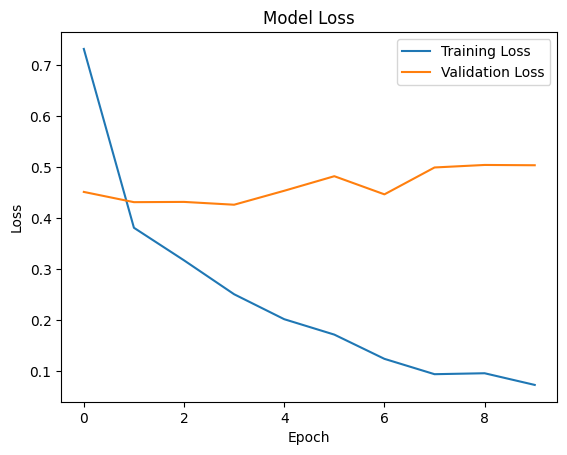

In [ ]:
# Step 8: Plot training results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Step 9: Evaluate
loss, accuracy = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {accuracy*100:.2f}%")

# Step 10: Classification report & confusion matrix
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_labels = (y_pred > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_labels, target_names=['AiArt', 'RealArt']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_labels))

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 496ms/step - accuracy: 0.8644 - loss: 0.3581

Validation Accuracy: 80.31%
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step

Classification Report:
              precision    recall  f1-score   support

       AiArt       0.78      0.90      0.83       107
     RealArt       0.84      0.69      0.76        86

    accuracy                           0.80       193
   macro avg       0.81      0.79      0.80       193
weighted avg       0.81      0.80      0.80       193


Confusion Matrix:
[[96 11]
 [27 59]]


ResNet50 vs Custom CNN

In [ ]:
# Importing Required Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Step 1: Define Dataset Path
dataset_path = '/content/drive/MyDrive/Dataset Images/ArtData'  # Adjust accordingly

In [ ]:
# Image Preprocessing Settings
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Image Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [ ]:
# Create Data Generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 777 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


In [ ]:
# Build Custom CNN Model
custom_model = Sequential([
    InputLayer(input_shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Compile Custom CNN Model
custom_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Early stopping and checkpoint for the Custom CNN Model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('custom_cnn_model.h5', save_best_only=True)

In [ ]:
# Train Custom CNN Model
history_custom = custom_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5938 - loss: 1.3250

25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.5946 - loss: 1.3145 - val_accuracy: 0.4767 - val_loss: 0.7078
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.6411 - loss: 0.7424 - val_accuracy: 0.4456 - val_loss: 0.9249
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6321 - loss: 0.7698 - val_accuracy: 0.4456 - val_loss: 1.1641
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6704 - loss: 0.6975 - val_accuracy: 0.4456 - val_loss: 1.8251
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6523 - loss: 0.6760 - val_accuracy: 0.4456 - val_loss: 3.0688
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6623 - loss: 0.6793 - val_accuracy: 0.4456 - val_loss: 3.4846


In [ ]:
# Load ResNet50 as Base Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze ResNet50 base model

In [ ]:
# Build ResNet50 Model
resnet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile ResNet50 Model
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train ResNet50 Model
history_resnet = resnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.5295 - loss: 0.7491 - val_accuracy: 0.4663 - val_loss: 0.7102
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.5377 - loss: 0.7267 - val_accuracy: 0.5751 - val_loss: 0.6826
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5545 - loss: 0.6846 - val_accuracy: 0.6010 - val_loss: 0.6771
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5457 - loss: 0.6896 - val_accuracy: 0.4715 - val_loss: 0.6990
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5396 - loss: 0.6974 - val_accuracy: 0.5596 - val_loss: 0.6815
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5813 - loss: 0.6901 - val_accuracy: 0.6010 - val_loss: 0.6811
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5587 - loss: 0.6831 - val_accuracy: 0.5855 - val_loss: 0.6881
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5980 - loss: 0.6712 - val_accuracy: 0.5596 - val_loss:

In [ ]:
# Evaluate Custom CNN Model
val_generator.reset()
loss_custom, accuracy_custom = custom_model.evaluate(val_generator)
print(f"\nCustom CNN Validation Accuracy: {accuracy_custom*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 930ms/step - accuracy: 0.2243 - loss: 0.7559

Custom CNN Validation Accuracy: 43.01%


In [ ]:
# Evaluate ResNet50 Model
val_generator.reset()
loss_resnet, accuracy_resnet = resnet_model.evaluate(val_generator)
print(f"\nResNet50 Validation Accuracy: {accuracy_resnet*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 952ms/step - accuracy: 0.7850 - loss: 0.6271

ResNet50 Validation Accuracy: 59.07%


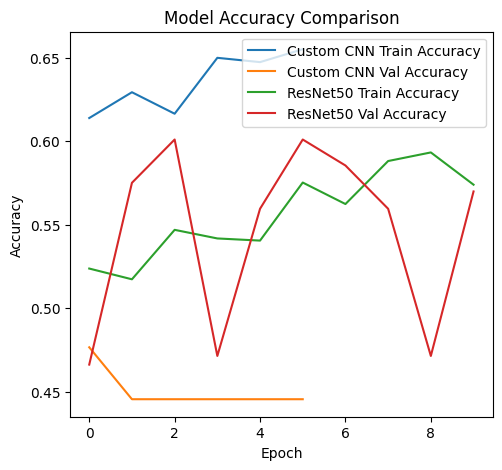

In [ ]:
# Plot Accuracy Comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_custom.history['accuracy'], label='Custom CNN Train Accuracy')
plt.plot(history_custom.history['val_accuracy'], label='Custom CNN Val Accuracy')
plt.plot(history_resnet.history['accuracy'], label='ResNet50 Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet50 Val Accuracy')
plt.title("Model Accuracy Comparison")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

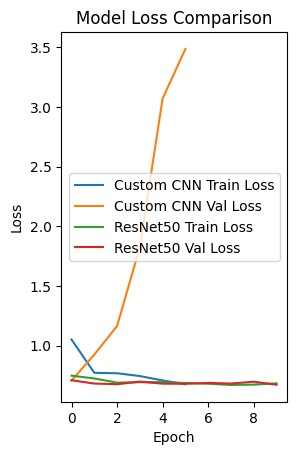

In [ ]:
# Plot Loss Comparison
plt.subplot(1, 2, 2)
plt.plot(history_custom.history['loss'], label='Custom CNN Train Loss')
plt.plot(history_custom.history['val_loss'], label='Custom CNN Val Loss')
plt.plot(history_resnet.history['loss'], label='ResNet50 Train Loss')
plt.plot(history_resnet.history['val_loss'], label='ResNet50 Val Loss')
plt.title("Model Loss Comparison")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Classification Reports and Confusion Matrices for Both Models

# Custom CNN Predictions
y_true = val_generator.classes
y_pred_custom = custom_model.predict(val_generator)
y_pred_labels_custom = (y_pred_custom > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 730ms/step


In [ ]:
# ResNet50 Predictions
y_pred_resnet = resnet_model.predict(val_generator)
y_pred_labels_resnet = (y_pred_resnet > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


In [ ]:
# Classification Reports
print("\nCustom CNN Classification Report:")
print(classification_report(y_true, y_pred_labels_custom, target_names=['AiArt', 'RealArt']))

print("\nResNet50 Classification Report:")
print(classification_report(y_true, y_pred_labels_resnet, target_names=['AiArt', 'RealArt']))


Custom CNN Classification Report:
              precision    recall  f1-score   support

       AiArt       0.67      0.04      0.07       107
     RealArt       0.45      0.98      0.62        86

    accuracy                           0.46       193
   macro avg       0.56      0.51      0.34       193
weighted avg       0.57      0.46      0.31       193


ResNet50 Classification Report:
              precision    recall  f1-score   support

       AiArt       0.57      0.97      0.71       107
     RealArt       0.67      0.07      0.13        86

    accuracy                           0.57       193
   macro avg       0.62      0.52      0.42       193
weighted avg       0.61      0.57      0.45       193



In [ ]:
# Confusion Matrices
print("\nCustom CNN Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_labels_custom))

print("\nResNet50 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_labels_resnet))


Custom CNN Confusion Matrix:
[[  4 103]
 [  2  84]]

ResNet50 Confusion Matrix:
[[104   3]
 [ 80   6]]


Data Pre Processing

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
# Step 1: Set dataset path and image size
dataset_path = '/content/drive/MyDrive/Dataset Images/'  # Adjust the path
image_size = (224, 224)  # Resizing the images to 224x224
batch_size = 32

In [ ]:
# Step 2: Data Preprocessing and Augmentation
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Normalizing the image for ResNet50
    validation_split=0.2,  # Splitting 20% for validation
    rotation_range=20,  # Random rotations of images
    zoom_range=0.2,  # Zoom in/out range
    horizontal_flip=True,  # Randomly flipping the images horizontally
    width_shift_range=0.1,  # Randomly shift the image horizontally
    height_shift_range=0.1  # Randomly shift the image vertically
)

In [ ]:
# Step 3: Create training and validation data generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',  # Using the training subset
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',  # Using the validation subset
    shuffle=False
)

Found 1553 images belonging to 3 classes.
Found 387 images belonging to 3 classes.


In [ ]:
# Step 4: Visualizing Augmented Images
# Generate a batch of images and labels to visualize
x_batch, y_batch = next(train_generator)

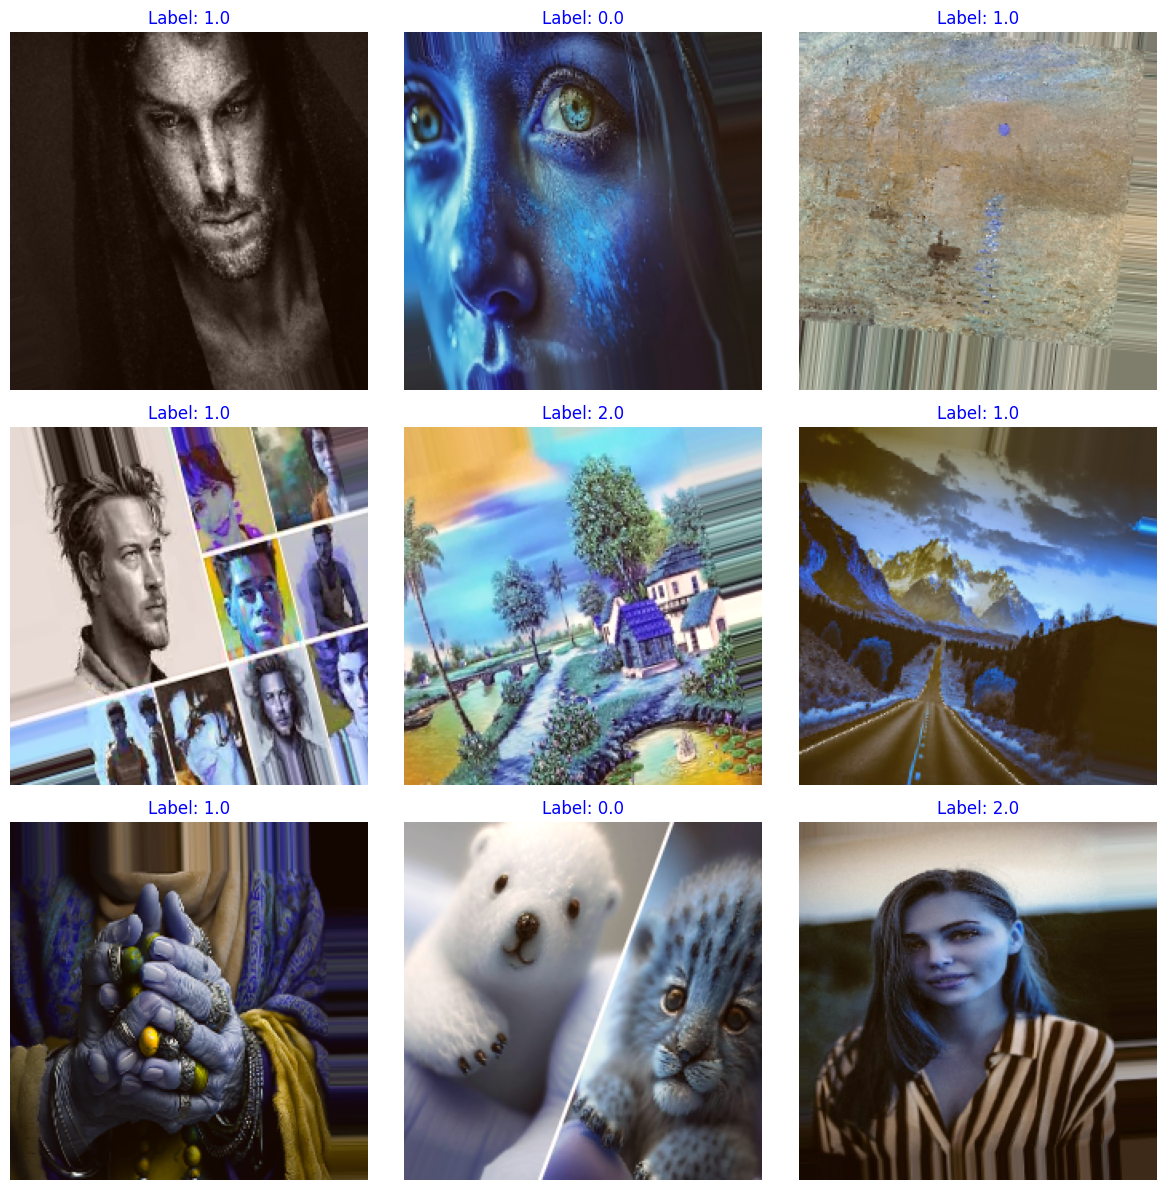

In [ ]:
# Rescale back the images to the valid range [0, 1] for displaying after preprocessing
# Since 'preprocess_input' normalizes the values to a different range, we reverse that normalization
x_batch_rescaled = x_batch + 123.68  # Reverting back to original scale (for ResNet50 preprocess_input)
x_batch_rescaled = np.clip(x_batch_rescaled, 0, 255)  # Ensure the values are within valid display range

# Plotting the first 9 images from the batch with improved clarity and rescaled values
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch_rescaled[i].astype(np.uint8))  # Display the rescaled image
    plt.title(f"Label: {y_batch[i]}", fontsize=12, color='blue')  # Label with clearer font size and color
    plt.axis('off')  # Hide axis for a cleaner look
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()